In [1]:
## check availability of GPU (nvidia-smi)
import os
os.environ["CUDA_VISIBLE_DEVICES"]="3"

In [2]:
from tensorflow.keras import mixed_precision
mixed_precision.set_global_policy('mixed_float16')

INFO:tensorflow:Mixed precision compatibility check (mixed_float16): OK
Your GPU will likely run quickly with dtype policy mixed_float16 as it has compute capability of at least 7.0. Your GPU: Tesla V100-SXM2-32GB, compute capability 7.0


In [3]:
import warnings
warnings.filterwarnings("ignore")

import os 
import glob

current_dir = "/mnt/akoustos/"

data_dir = current_dir + "Data/"
labeled_data_dir = data_dir + 'Labeled_Data/'
audio_dir = data_dir + "Raw_Audio/"

spectrogram_dir = data_dir + "Extracted_Spectrogram/"
if not os.path.exists(spectrogram_dir):
    os.makedirs(spectrogram_dir)


In [4]:
from src.data_split import Data_Split
categories = []   ## classify all categories
data = Data_Split.data_split(categories, spectrogram_dir, include_no_label_category = True)
print(data.head(10))

            label  Count  Percentage
0              14    500       18.20
1              25    500       18.20
2            2662    407       14.81
3            4949    501       18.23
4            5620    382       13.90
5  No Sound Event    458       16.67
Size of train, val, test dataset: 1922 413 413
Percentage of train, val, test dataset: 69.9% 15.0% 15.0%
                                            filename           label  split
0  /mnt/akoustos/Data/Extracted_Spectrogram/proje...            2662  train
1  /mnt/akoustos/Data/Extracted_Spectrogram/proje...            4949  train
2  /mnt/akoustos/Data/Extracted_Spectrogram/proje...              25    val
3  /mnt/akoustos/Data/Extracted_Spectrogram/proje...              25  train
4  /mnt/akoustos/Data/Extracted_Spectrogram/proje...              25   test
5  /mnt/akoustos/Data/Extracted_Spectrogram/proje...            4949  train
6  /mnt/akoustos/Data/Extracted_Spectrogram/proje...              25   test
7  /mnt/akoustos/Data/Extrac

### Train with a Customized CNN 

Please choose one model from the available models: Customized_CNN, Resnet18, Resnet34, Resnet50, Resnet101, Resnet152, Alexnet, VGG11, VGG13, VGG16, VGG19, Densenet121, Densenet169, Densenet201, Squeezenet1_0.
Begin training.
Epoch 01: | Train Loss: 159.44427 | Val Loss: 59.71850 | Train Acc: 0.265| Val Acc: 0.291
Epoch 02: | Train Loss: 26.33524 | Val Loss: 8.43252 | Train Acc: 0.456| Val Acc: 0.666
Epoch 03: | Train Loss: 13.83359 | Val Loss: 6.57085 | Train Acc: 0.528| Val Acc: 0.545
Epoch 04: | Train Loss: 4.36955 | Val Loss: 2.54183 | Train Acc: 0.639| Val Acc: 0.697
Epoch 05: | Train Loss: 2.35634 | Val Loss: 1.64070 | Train Acc: 0.644| Val Acc: 0.688
Epoch 06: | Train Loss: 1.70049 | Val Loss: 0.95533 | Train Acc: 0.659| Val Acc: 0.743
Epoch 07: | Train Loss: 0.97650 | Val Loss: 0.70190 | Train Acc: 0.698| Val Acc: 0.794
Epoch 08: | Train Loss: 0.73792 | Val Loss: 0.64751 | Train Acc: 0.746| Val Acc: 0.794
Epoch 09: | Train Loss: 0.71536 | Val Loss: 0.62796 | Train Acc: 0.766| V

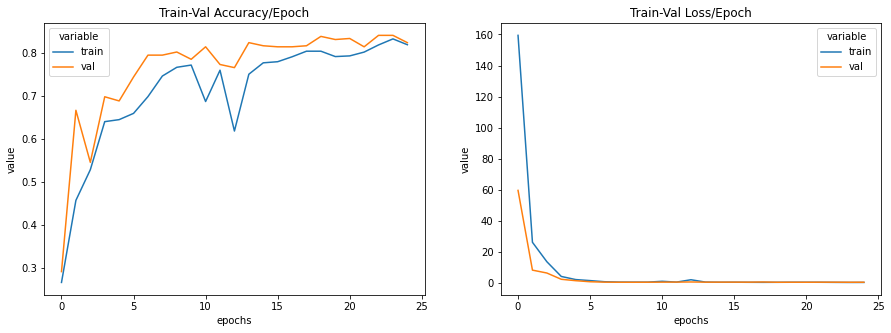

Scoring results on testset:
              precision    recall  f1-score   support

           0       0.96      0.86      0.91        64
           1       0.85      0.92      0.88        77
           2       0.88      0.87      0.88        53
           3       0.62      0.69      0.65        80
           4       0.73      0.63      0.68        63
           5       0.63      0.63      0.63        76

    accuracy                           0.76       413
   macro avg       0.78      0.77      0.77       413
weighted avg       0.77      0.76      0.76       413

Confusion matrix on testset:
                      pred: 14  pred: 25  pred: 2662  pred: 4949  pred: 5620  \
true: 14                    55         1           0           2           2   
true: 25                     0        71           0           1           2   
true: 2662                   0         2          46           0           3   
true: 4949                   2         1           2          55           8   


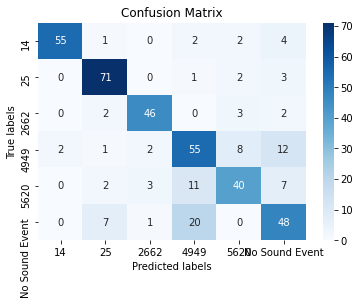

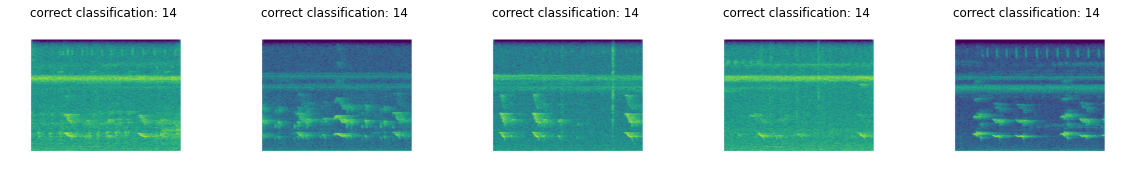

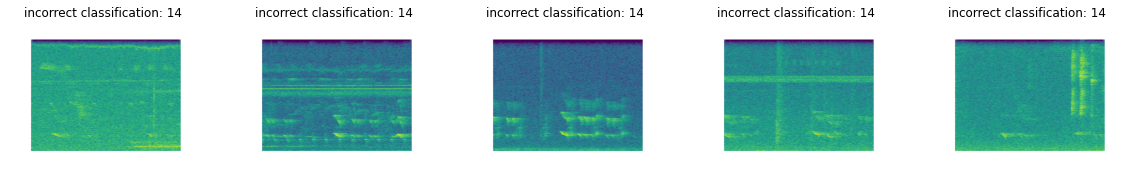

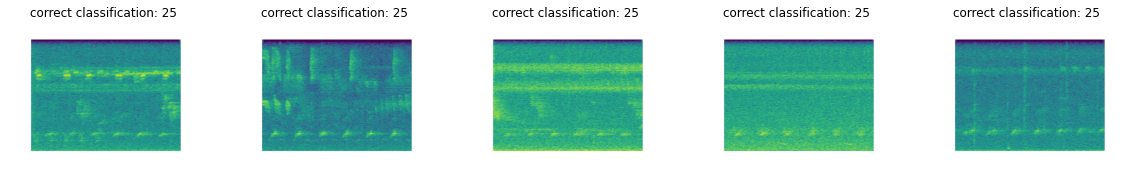

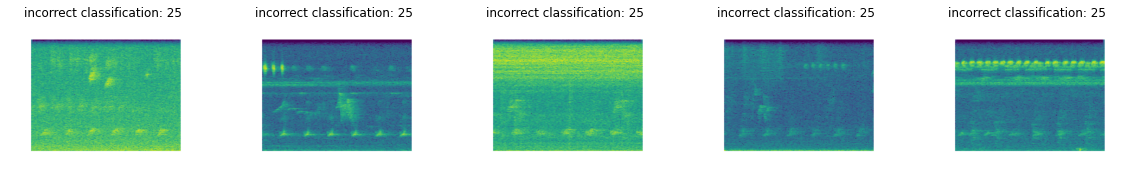

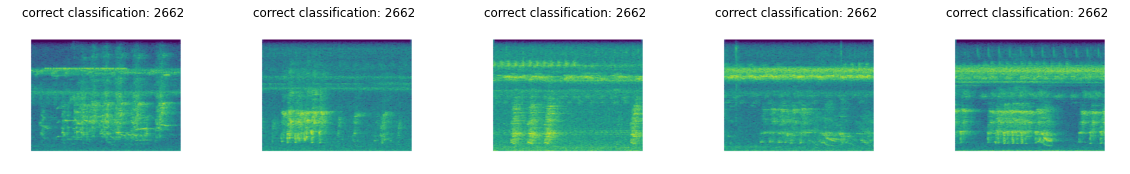

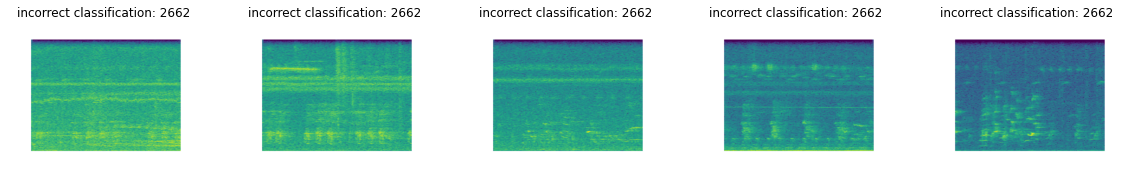

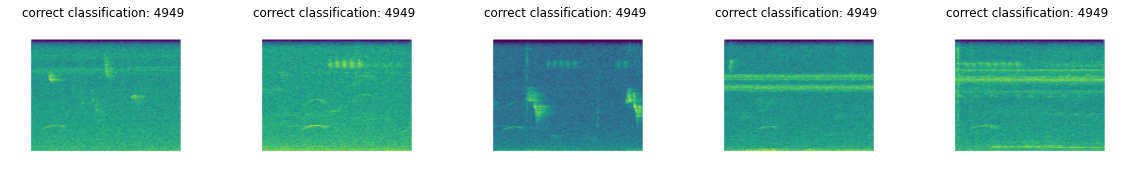

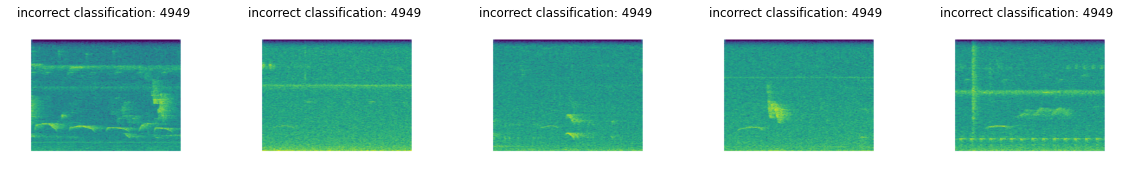

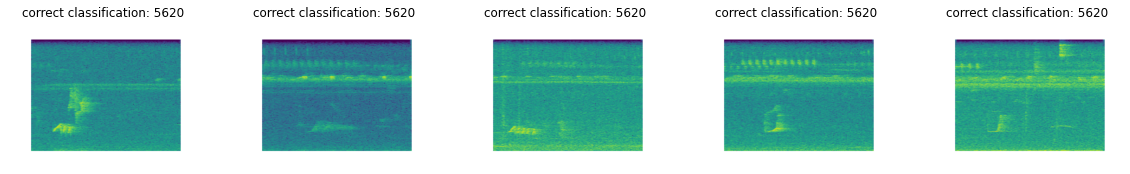

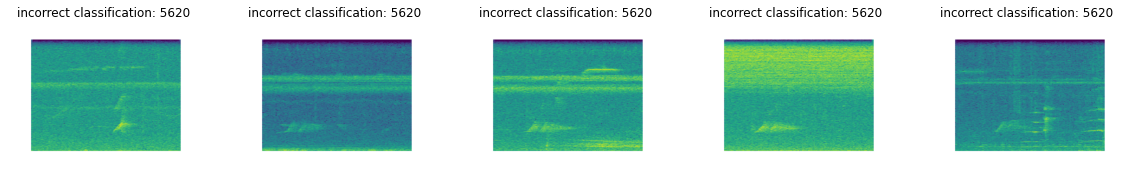

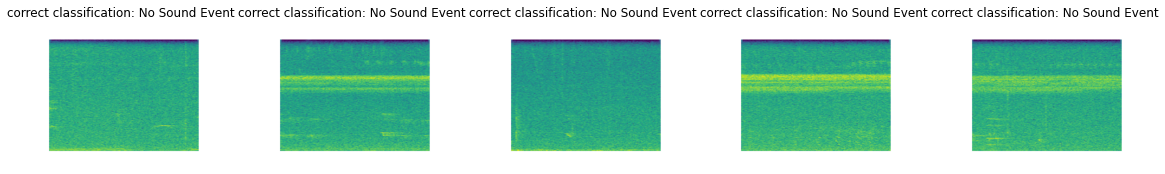

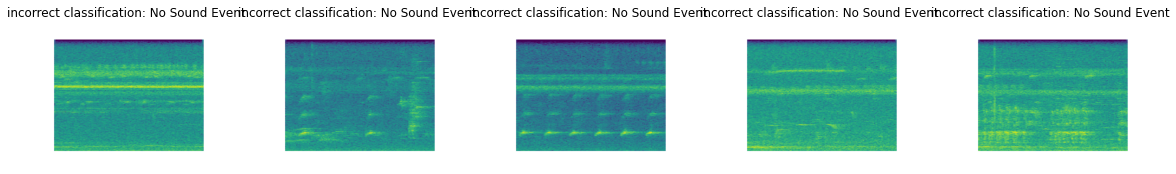

In [5]:
from src.model.multiclass_classification import multiclass_classification_models
model = multiclass_classification_models.train_model(data = data, 
                                                     model_name = 'Customized_CNN', 
                                                     batch_size = 32,  
                                                     optimizer = 'Adam', 
                                                     learning_rate = 0.008, 
                                                     lr_decay = False, 
                                                     num_epochs = 25)


### Fine-tune a pre-trained model

Please choose one model from the available models: Customized_CNN, Resnet18, Resnet34, Resnet50, Resnet101, Resnet152, Alexnet, VGG11, VGG13, VGG16, VGG19, Densenet121, Densenet169, Densenet201, Squeezenet1_0.
Begin training.
Epoch 01: | Train Loss: 0.87251 | Val Loss: 0.68928 | Train Acc: 0.720| Val Acc: 0.814
Epoch 02: | Train Loss: 0.72413 | Val Loss: 0.65372 | Train Acc: 0.784| Val Acc: 0.835
Epoch 03: | Train Loss: 0.71384 | Val Loss: 0.64369 | Train Acc: 0.801| Val Acc: 0.831
Epoch 04: | Train Loss: 0.73283 | Val Loss: 0.65275 | Train Acc: 0.784| Val Acc: 0.835
Epoch 05: | Train Loss: 0.73698 | Val Loss: 0.67673 | Train Acc: 0.783| Val Acc: 0.826
Epoch 06: | Train Loss: 0.72280 | Val Loss: 0.67177 | Train Acc: 0.790| Val Acc: 0.831
Epoch 07: | Train Loss: 0.73185 | Val Loss: 0.68982 | Train Acc: 0.788| Val Acc: 0.818
Epoch 08: | Train Loss: 0.72267 | Val Loss: 0.66549 | Train Acc: 0.788| Val Acc: 0.828
Epoch 09: | Train Loss: 0.70353 | Val Loss: 0.64982 | Train Acc: 0.806| Val Ac

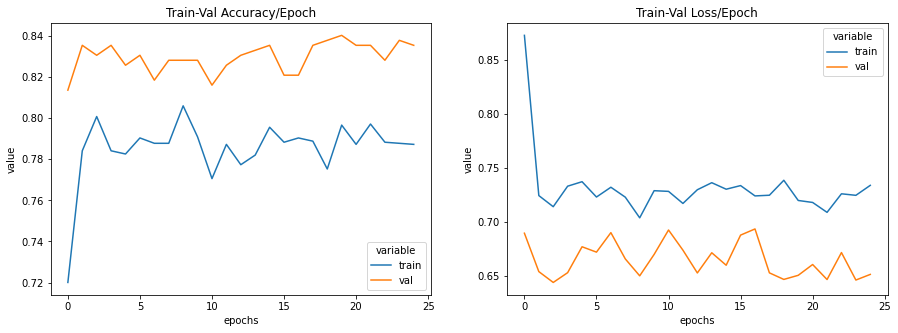

Scoring results on testset:
              precision    recall  f1-score   support

           0       0.78      0.95      0.86        64
           1       0.91      0.91      0.91        77
           2       0.81      0.96      0.88        53
           3       0.84      0.71      0.77        80
           4       0.74      0.76      0.75        63
           5       0.81      0.66      0.72        76

    accuracy                           0.82       413
   macro avg       0.81      0.83      0.82       413
weighted avg       0.82      0.82      0.81       413

Confusion matrix on testset:
                      pred: 14  pred: 25  pred: 2662  pred: 4949  pred: 5620  \
true: 14                    61         0           1           2           0   
true: 25                     6        70           1           0           0   
true: 2662                   1         0          51           0           1   
true: 4949                   4         0           5          57           7   


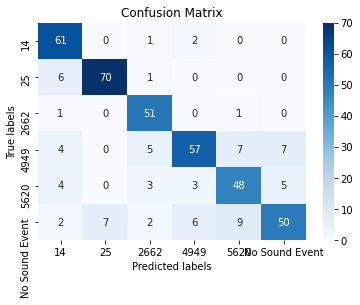

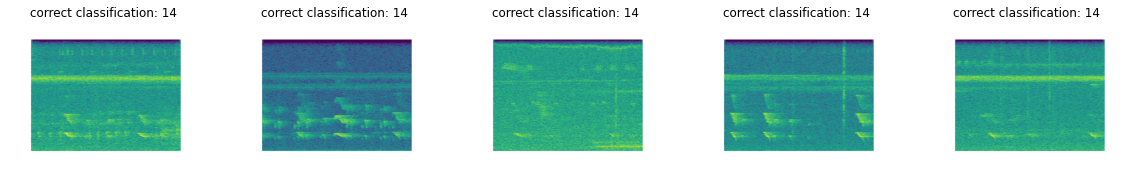

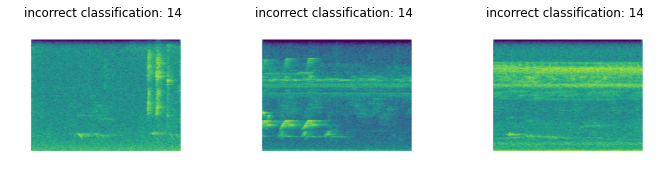

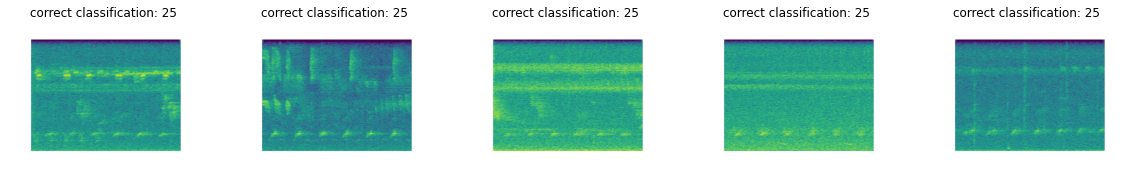

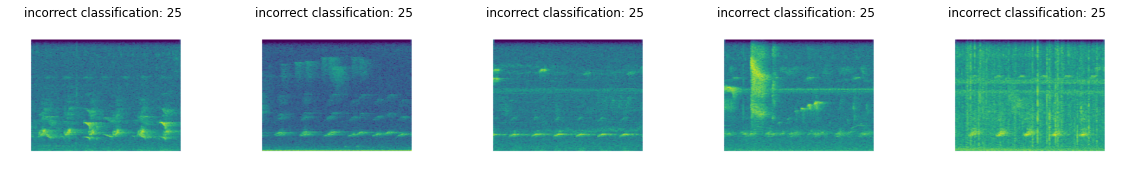

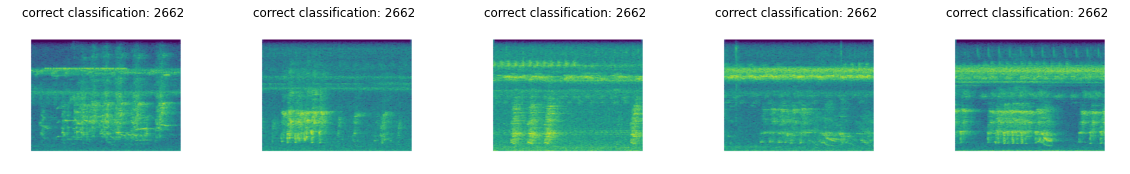

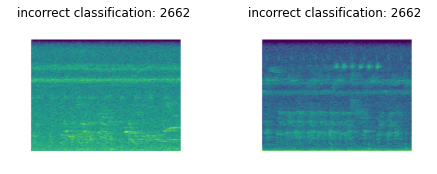

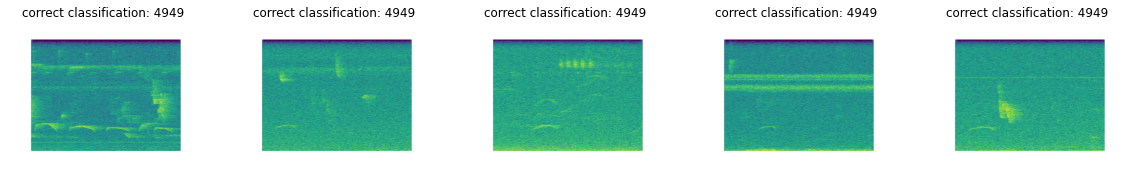

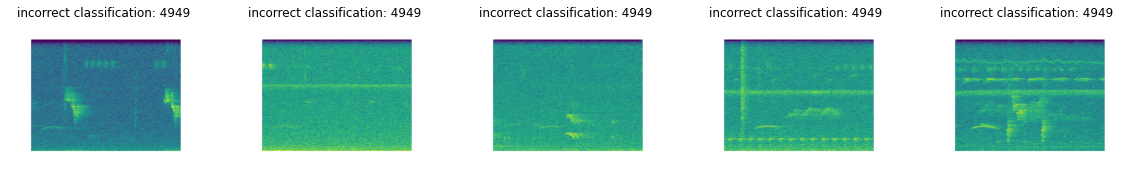

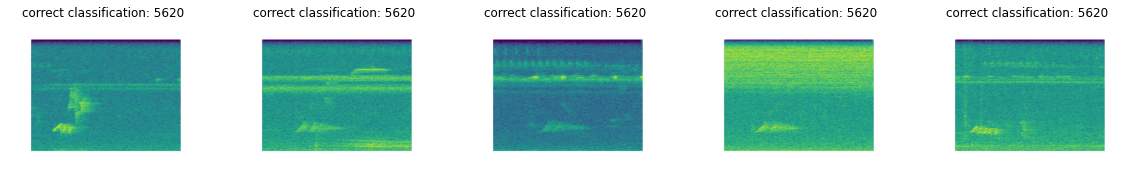

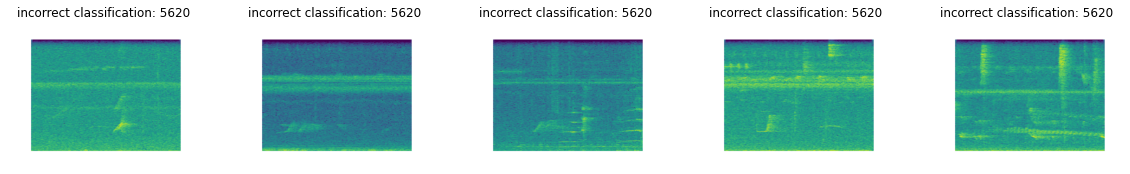

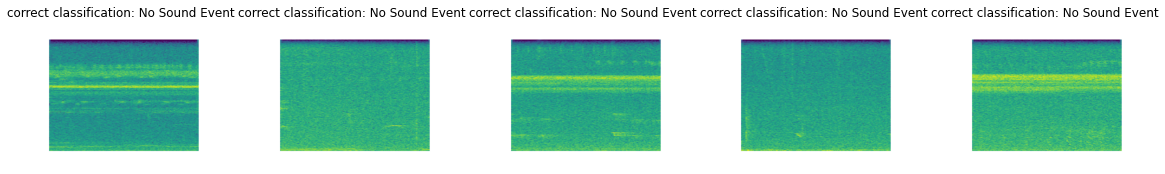

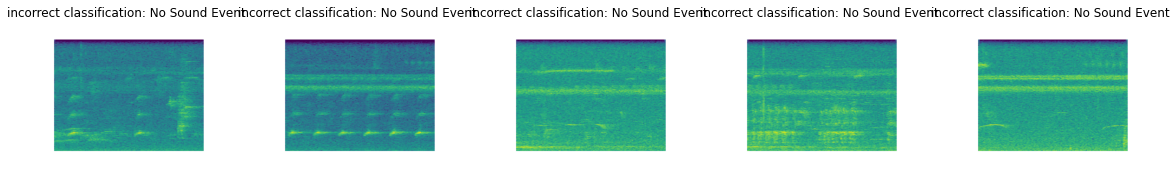

In [6]:
from src.model.multiclass_classification import multiclass_classification_models
model = multiclass_classification_models.train_model(data = data, 
                                                 model_name = 'Densenet121', 
                                                 batch_size = 32, 
                                                 pretrained = True, 
                                                 optimizer = 'Adam', 
                                                 learning_rate = 0.0005, 
                                                 lr_decay = True, 
                                                 num_epochs = 25)


Please choose one model from the available models: Customized_CNN, Resnet18, Resnet34, Resnet50, Resnet101, Resnet152, Alexnet, VGG11, VGG13, VGG16, VGG19, Densenet121, Densenet169, Densenet201, Squeezenet1_0.
Begin training.
Epoch 01: | Train Loss: 1.00245 | Val Loss: 0.67898 | Train Acc: 0.658| Val Acc: 0.811
Epoch 02: | Train Loss: 0.77680 | Val Loss: 0.68848 | Train Acc: 0.745| Val Acc: 0.797
Epoch 03: | Train Loss: 0.78289 | Val Loss: 0.65405 | Train Acc: 0.748| Val Acc: 0.794
Epoch 04: | Train Loss: 0.80468 | Val Loss: 0.66372 | Train Acc: 0.748| Val Acc: 0.794
Epoch 05: | Train Loss: 0.78833 | Val Loss: 0.65868 | Train Acc: 0.742| Val Acc: 0.801
Epoch 06: | Train Loss: 0.78785 | Val Loss: 0.66180 | Train Acc: 0.744| Val Acc: 0.792
Epoch 07: | Train Loss: 0.78098 | Val Loss: 0.67196 | Train Acc: 0.746| Val Acc: 0.801
Epoch 08: | Train Loss: 0.78333 | Val Loss: 0.66412 | Train Acc: 0.737| Val Acc: 0.797
Epoch 09: | Train Loss: 0.78505 | Val Loss: 0.68753 | Train Acc: 0.746| Val Ac

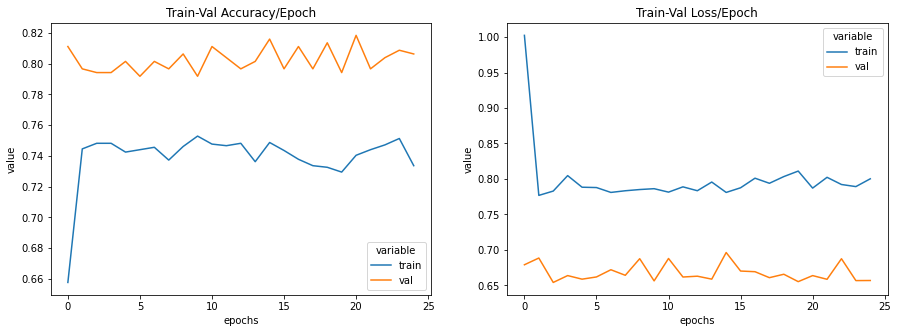

Scoring results on testset:
              precision    recall  f1-score   support

           0       0.91      0.91      0.91        64
           1       0.90      0.96      0.93        77
           2       0.85      0.89      0.87        53
           3       0.70      0.84      0.76        80
           4       0.77      0.43      0.55        63
           5       0.60      0.64      0.62        76

    accuracy                           0.78       413
   macro avg       0.79      0.78      0.77       413
weighted avg       0.78      0.78      0.77       413

Confusion matrix on testset:
                      pred: 14  pred: 25  pred: 2662  pred: 4949  pred: 5620  \
true: 14                    58         0           0           3           3   
true: 25                     0        74           0           0           0   
true: 2662                   2         0          47           0           0   
true: 4949                   2         0           2          67           2   


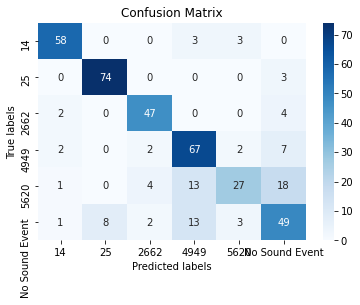

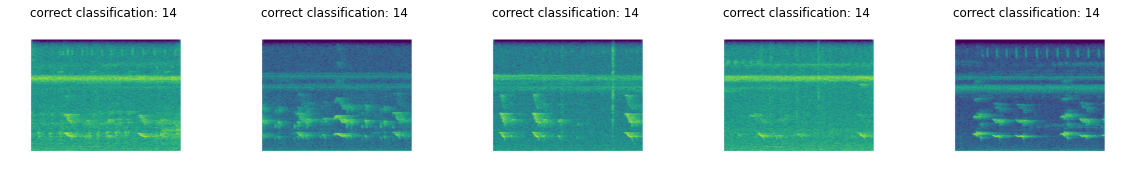

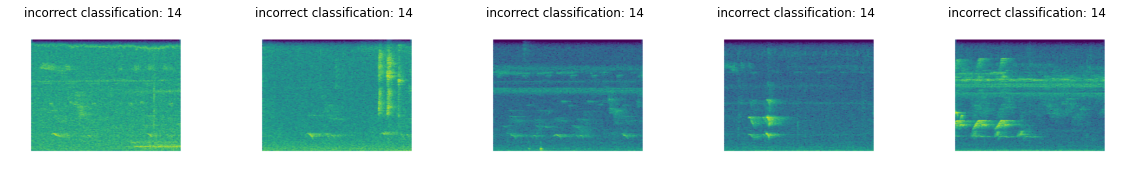

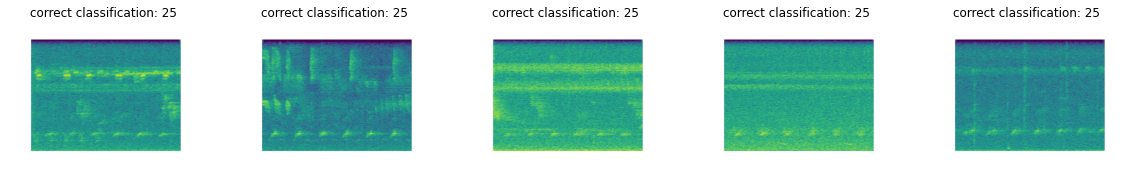

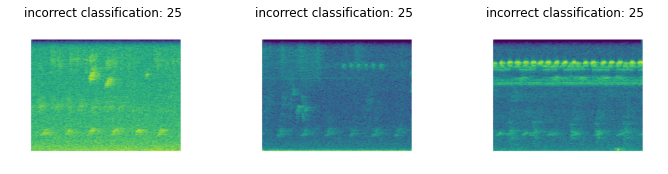

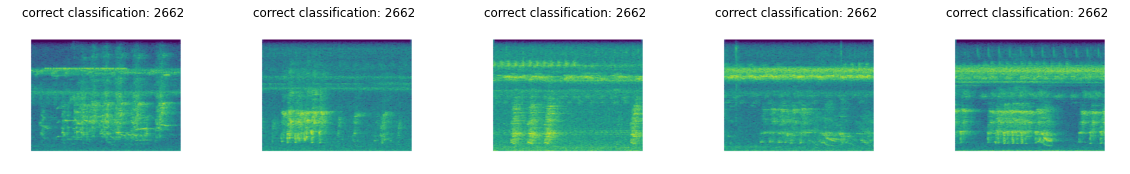

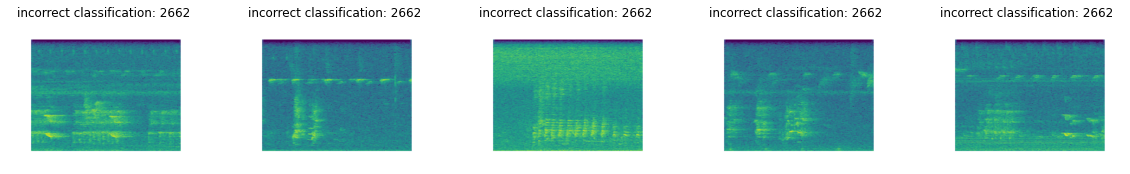

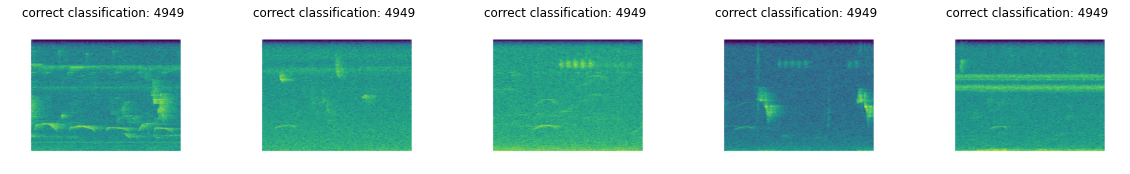

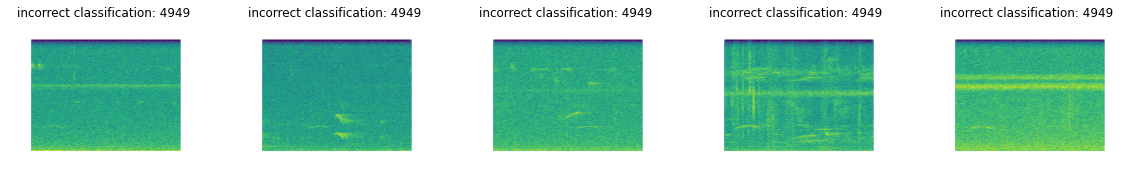

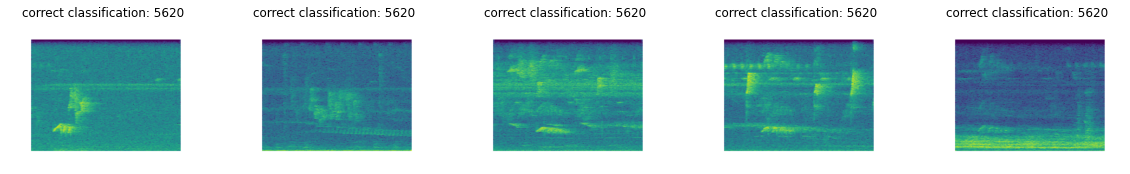

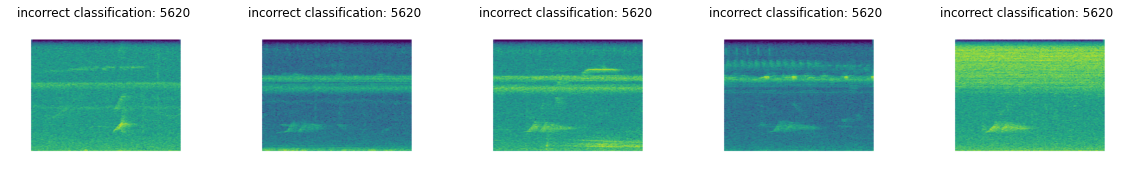

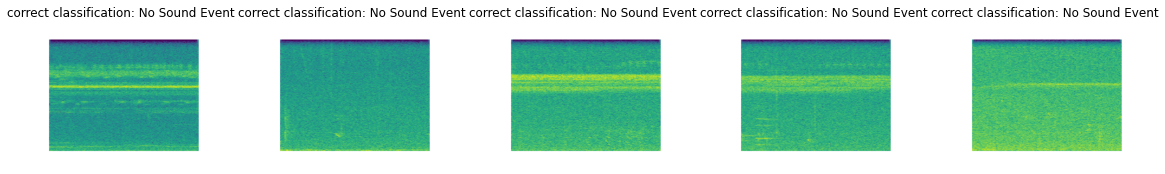

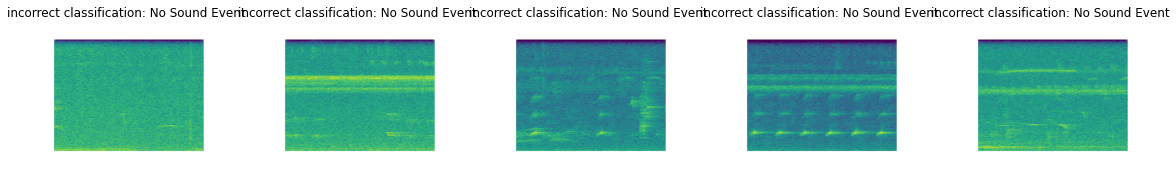

In [7]:
from src.model.multiclass_classification import multiclass_classification_models
model = multiclass_classification_models.train_model(data = data, 
                                                 model_name = 'Densenet121', 
                                                 batch_size = 32, 
                                                 pretrained = True, 
                                                 optimizer = 'Adam', 
                                                 learning_rate = 0.002, 
                                                 lr_decay = True, 
                                                 num_epochs = 25)
